# Assignment 2

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Exit if PUIDATA is not set. Otherwise, print the value.
puidata = os.getenv("PUIDATA")
if puidata is None:
    print("You must set the PUIDATA environment variable.")
    sys.exit(1)
else:
    print("PUIDATA=%s" % puidata)

PUIDATA=/nfshome/aaw329/PUIdata


## Acquire the Citi Bike data

In [3]:
# Download Citi Bike data into PUIDATA directory if it's not there yet
filename = "201809-citibike-tripdata.csv"  # We want the trip data from September 2018
url_base = "https://s3.amazonaws.com/tripdata"

# Check if the data is not there in .csv or .zip format
if not os.path.isfile(puidata + "/" + filename) and not os.path.isfile(puidata + "/" + filename + ".zip"):
    print("Downloading data")
    os.system("wget -O " + puidata + "/" + filename + ".zip" + " " + url_base + "/" + filename + ".zip")
    print("Unzipping data")
    os.system("unzip -d " + puidata + " " + puidata + "/" + filename + ".zip")
# Check if the data _is_ there .zip format but not .csv, in which case we just need to unzip it
elif os.path.isfile(puidata + "/" + filename + ".zip") and not os.path.isfile(puidata + "/" + filename):
    print("Unzipping data")
    os.system("unzip -d " + puidata + " " + puidata + "/" + filename + ".zip")

# Finally, make sure the correct file is present
if not os.path.isfile(puidata + "/" + filename):
    print("Problem acquiring data!")
    sys.exit(1)
else:
    print("Successfully acquired data")

Successfully acquired data


## Formulate a hypothesis

IDEA: most Citi Bike rides were taken by people under the age of 40, with significance level $\alpha = 0.05$

With $R_{>=40}$ meaning the number of rides taken by those age 40 or over, $R_{<40}$ meaning rides taken by those under age 40, and $R_{all}$ meaning the total number of rides,

### Null hypothesis $$ H_0: \frac{R_{>=40}}{R_{all}} >= 50\% $$

### Alternative hypothesis $$ H_1: \frac{R_{<40}}{R_{all}} < 50\% $$


## Wrangle the data


In [4]:
# Read in the .csv file with pandas
df = pd.read_csv(puidata + "/" + filename)

In [5]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1635,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,132,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0
2,3337,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1
3,436,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2
4,8457,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1


In [6]:
df = df[["birth year"]]

# However, we need to translate "birth year" into whether someone is over or under 40
year = 2018
df["under 40"] = df["birth year"].apply(lambda x: True if x > (year-40) else False)  # 1 if under 40, else 0
# Drop the actual year
df = df[["under 40"]]

In [7]:
df.head(5)

,under 40
0,True
1,False
2,False
3,True
4,True


## Plot the data

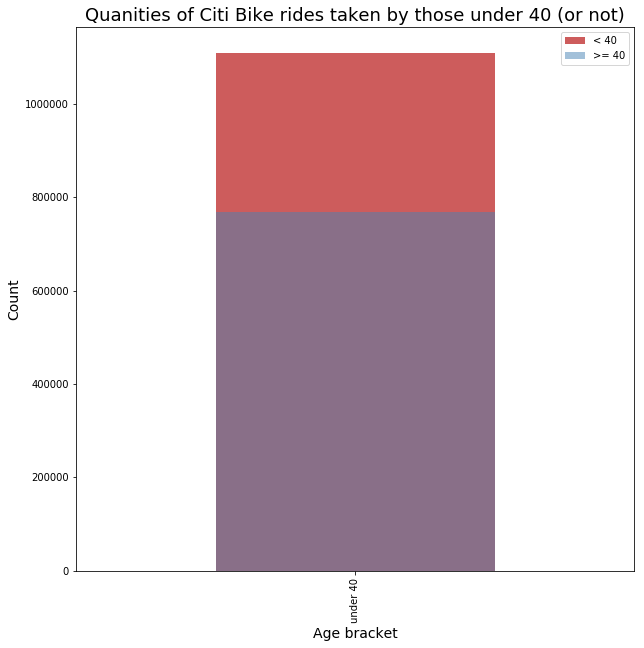

In [8]:
fig = plt.figure(figsize=(10,10))
df[df["under 40"] == True].count().plot(kind="bar", color="IndianRed", label="< 40")
axes= df[df["under 40"] == False].count().plot(kind="bar", color="SteelBlue", alpha=0.5, label=">= 40")
plt.xlabel("Age bracket", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Quanities of Citi Bike rides taken by those under 40 (or not)", fontsize=18)
plt.legend()

### Figure 1: number of rides that were taken by riders that were at least 40 years old, superimposed on the number of rides that were taken by riders younger than 40 years old. 